<a href="https://colab.research.google.com/github/Agnaputra/PCVK_Ganjil_2025_01/blob/main/JOBSHEET1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

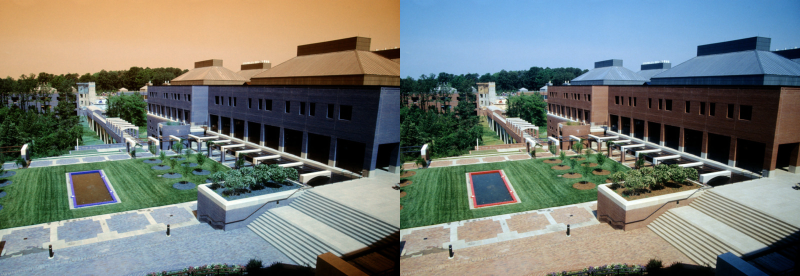

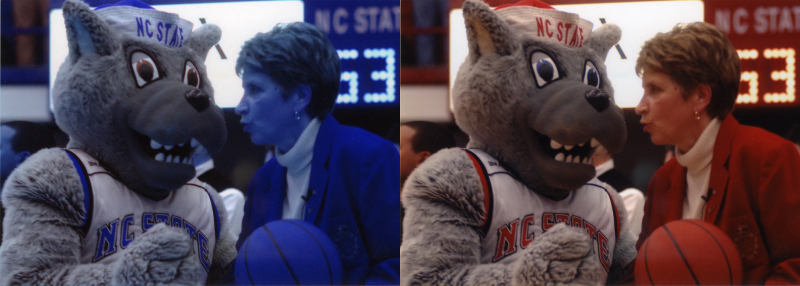

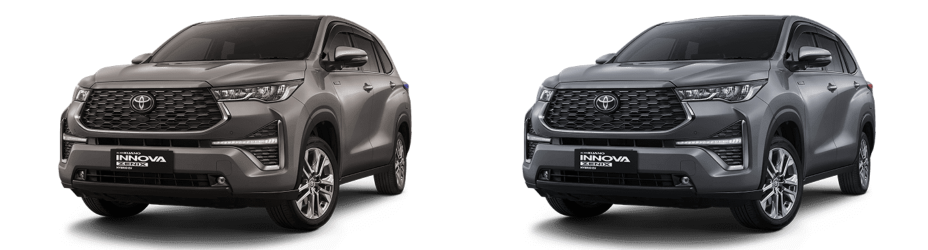



resolusi image: tinggi x lebar =  250  x  464


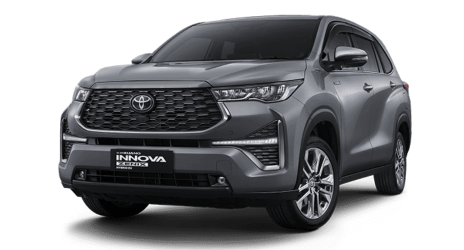

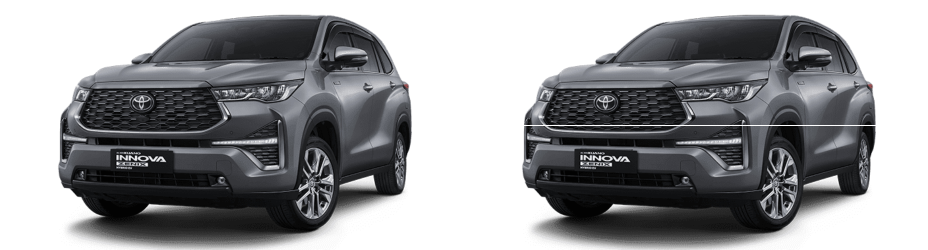

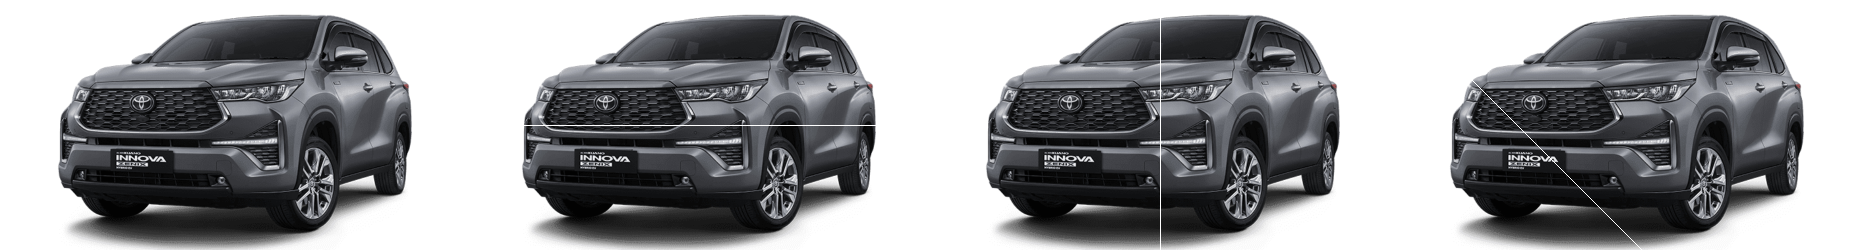

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
"https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
"https://astradigitaldigiroomuat.blob.core.windows.net/storage-uat-001/jenis-mobil-pribadi.jpg"]
# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)
    image = cv.resize(image, (0,0), fx=0.5, fy=0.5) #resize image to half size
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    final_frame = cv.hconcat((image, image_2))
    cv2_imshow(final_frame)
    print('\n')

#read image

#convert color to RGB
#concatenate image
#show image

tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi," x ",lebar)
cv2_imshow(image_2)

image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2),y]= [255,255,255]

final_frame=cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

# Copy image for modifications
image_v = image_2.copy()
image_d = image_2.copy()

# Vertical line (white) in the middle of the image
for x in range(tinggi):
    image_v[x, int(lebar/2)] = [255,255,255]

# Diagonal line (white) from top-left to bottom-right
for i in range(min(tinggi, lebar)):
    image_d[i, i] = [255,255,255]

# Concatenate all images to compare: original + horizontal + vertical + diagonal
final_frame = cv.hconcat([image_2, image_3, image_v, image_d])
cv2_imshow(final_frame)



# Perbandingan Gambar (Original vs Copy Step 1)**bold text**

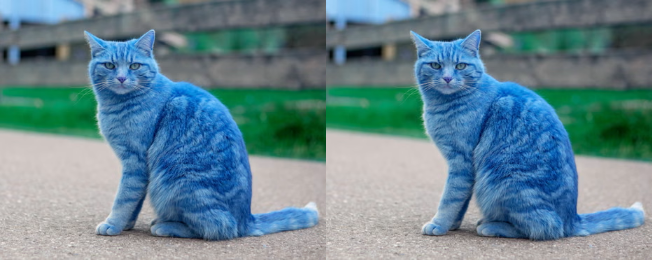

Step 1: Perbandingan Gambar (Original vs Copy).


In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# === 1. Practical steps: load image, resize, dan konversi ke RGB ===
image = cv.imread("/content/3542.avif")
image = cv.resize(image, (0,0), fx=0.7, fy=0.7)  # resize biar lebih kecil
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB) # konversi ke RGB

tinggi, lebar, _ = image_rgb.shape

# Copy dari original untuk dibandingkan
image_copy = image_rgb.copy()

# Gabungkan Original (kiri) dan Copy (kanan)
final_compare = cv.hconcat([image_rgb, image_copy])

cv2_imshow(final_compare)
print("Step 1: Perbandingan Gambar (Original vs Copy).")


# **Step 2a: Hanya garis vertikal putih**

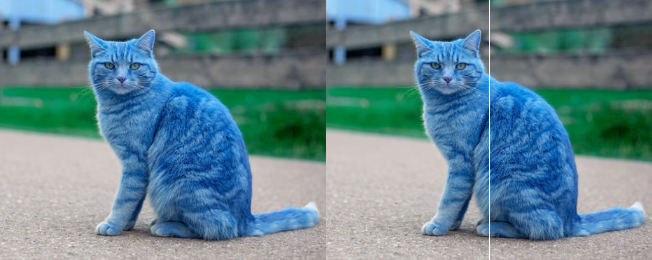

Step 2a: Perbandingan Original vs Garis Vertikal.


In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Load ulang gambar agar bersih
image = cv.imread("/content/3542.avif")
image = cv.resize(image, (0,0), fx=0.7, fy=0.7)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

tinggi, lebar, _ = image_rgb.shape

# Copy untuk modifikasi
img_vertical = image_rgb.copy()

# Garis vertikal putih di tengah
for y in range(tinggi):
    img_vertical[y, lebar//2] = [255,255,255]

# Gabungkan original (kiri) dan hasil modifikasi (kanan)
final_vertical = cv.hconcat([image_rgb, img_vertical])

cv2_imshow(final_vertical)
print("Step 2a: Perbandingan Original vs Garis Vertikal.")


# **Step 2b: Garis vertikal + diagonal**

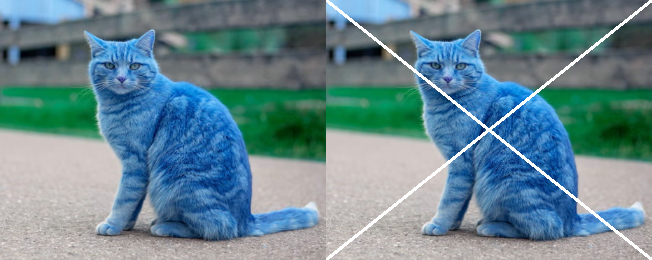

Step 2b: Perbandingan Original vs Garis Vertikal + Diagonal.


In [14]:
# Copy untuk modifikasi
img_vd = image_rgb.copy()

# Garis diagonal kiri-atas ke kanan-bawah
cv.line(img_vd, (0,0), (lebar-1, tinggi-1), (255,255,255), 2)

# Garis diagonal kiri-bawah ke kanan-atas
cv.line(img_vd, (0,tinggi-1), (lebar-1,0), (255,255,255), 2)

# Gabungkan original (kiri) dan hasil modifikasi (kanan)
final_vd = cv.hconcat([image_rgb, img_vd])

cv2_imshow(final_vd)
print("Step 2b: Perbandingan Original vs Garis Vertikal + Diagonal.")


# **Step 3: Garis Horizontal Putih di Tengah**

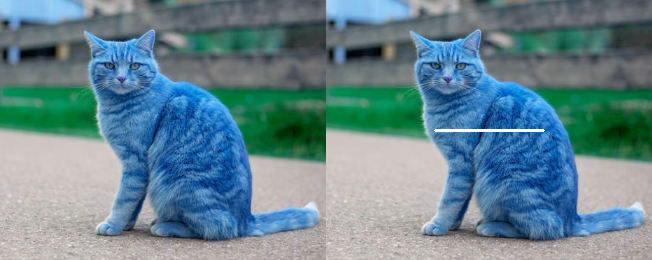

Step 3: Perbandingan Original vs Garis Horizontal.


In [12]:
# === 3. Tambah garis horizontal di tengah ===
img_h = image_rgb.copy()

panjang_garis = lebar // 3  # panjang garis = 1/3 lebar gambar
start_x = (lebar - panjang_garis) // 2
end_x = start_x + panjang_garis

# Garis horizontal putih di tengah
cv.line(img_h, (start_x, tinggi//2), (end_x, tinggi//2), (255,255,255), 2)

# Gabungkan original (kiri) dan hasil modifikasi (kanan)
final_h = cv.hconcat([image_rgb, img_h])

cv2_imshow(final_h)
print("Step 3: Perbandingan Original vs Garis Horizontal.")


Step 4: Kotak putih di tengah gambar


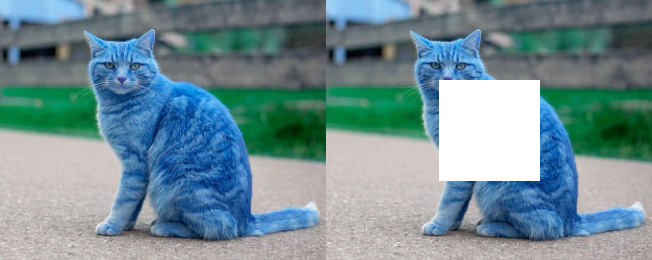

In [8]:
# === 4. Kotak putih di area tertentu ===
img_box = image_rgb.copy()

# Tentukan ukuran kotak (misalnya 100x100 px di tengah gambar)
box_size = 100
x1 = lebar//2 - box_size//2
y1 = tinggi//2 - box_size//2
x2 = x1 + box_size
y2 = y1 + box_size

# Gambar kotak putih isi penuh (-1 = fill)
cv.rectangle(img_box, (x1,y1), (x2,y2), (255,255,255), -1)

# Gabungkan original dengan hasil kotak putih
final_box = cv.hconcat([image_rgb, img_box])

print("Step 4: Kotak putih di tengah gambar")
cv2_imshow(final_box)
